# Heart Disease Prediction

## Project Description
This project aims to develop a machine learning-based model to predict the likelihood of heart disease in individuals based on key health indicators such as age, cholesterol levels, blood pressure, and other relevant clinical features. The model utilizes historical patient data to learn patterns and assist healthcare professionals in identifying high-risk patients for early intervention and treatment.

## Problem Statement
Heart disease remains one of the leading causes of death globally. Early diagnosis is crucial but often challenging due to the complex interplay of risk factors. Traditional diagnostic methods can be time-consuming and expensive. Therefore, there is a need for an accurate, efficient, and automated system that can predict the risk of heart disease using patient data, enabling timely and preventive healthcare decisions.

## Dataset Description
This dataset contains 303 records of patients and their medical attributes. It is commonly used for binary classification: predicting whether a patient has heart disease or not.

The target column is the key label:

1 = presence of heart disease

0 = absence of heart disease

In [148]:
## Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

In [149]:
# Load dataset
df = pd.read_csv(r"C:\Users\JUMOKE\Downloads\heart.csv")

# Exploratory Data Analysis

In [150]:
#top 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [151]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [153]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [154]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [155]:
df.shape

(303, 14)

In [156]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'Heart Disease Distribution')

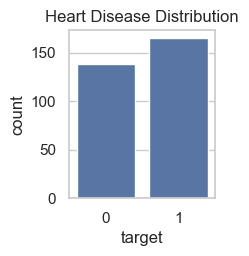

In [157]:
# Heart disease distribution
plt.subplot(2, 3, 1)
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')

Text(0.5, 1.0, 'Age Distribution by Heart Disease')

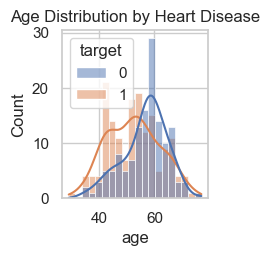

In [158]:
# Age distribution by target
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='age', hue='target', kde=True, bins=20)
plt.title('Age Distribution by Heart Disease')

Text(0.5, 1.0, 'Sex vs Heart Disease')

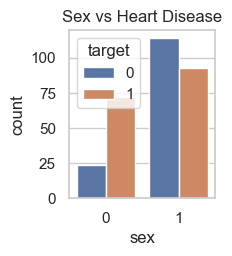

In [159]:
# Sex vs target
plt.subplot(2, 3, 3)
sns.countplot(x='sex', hue='target', data=df)
plt.title('Sex vs Heart Disease')



Text(0.5, 1.0, 'Chest Pain Type vs Heart Disease')

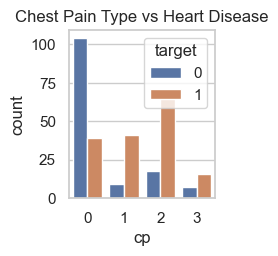

In [160]:
# Chest pain type vs target
plt.subplot(2, 3, 4)
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')

Text(0.5, 1.0, 'Max Heart Rate by Heart Disease')

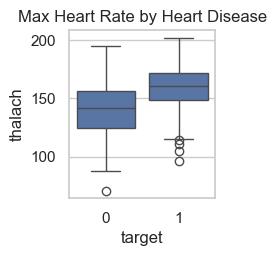

In [161]:
# Max heart rate vs target
plt.subplot(2, 3, 5)
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Max Heart Rate by Heart Disease')

Text(0.5, 1.0, 'Feature Correlation')

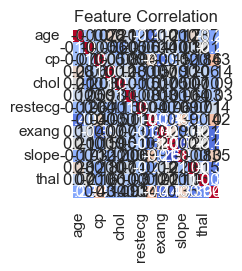

In [162]:
# Correlation heatmap
plt.subplot(2, 3, 6)
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title('Feature Correlation')

# Features and target

In [163]:
X = df.drop('target', axis=1)
y = df['target']

In [164]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model

In [165]:
# Train/test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# ✅ Save model
joblib.dump(model, 'heart_model.pkl')  # <-- IMPORTANT

['heart_model.pkl']

In [166]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

In [167]:
# Performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC AUC:", auc)

Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375
ROC AUC: 0.9202586206896551


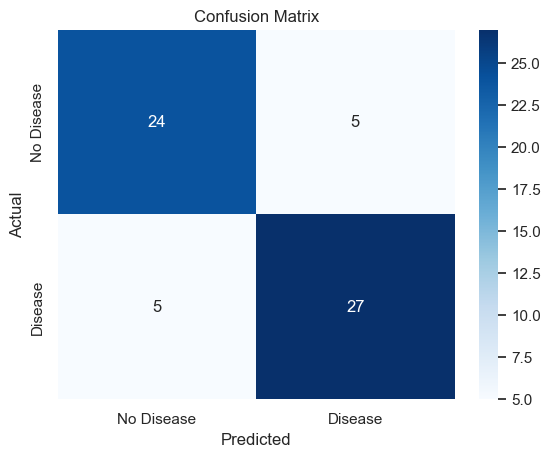

In [168]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

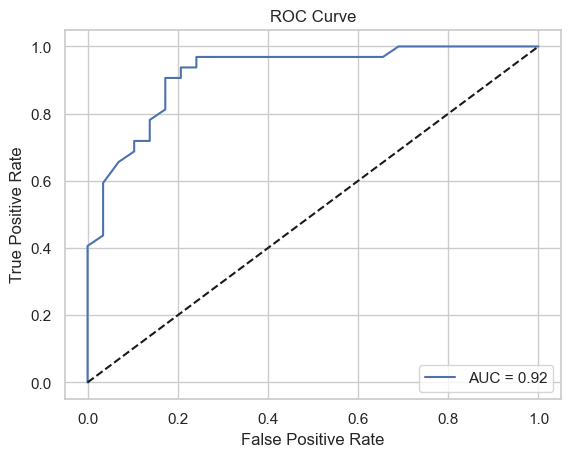

In [169]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()